In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

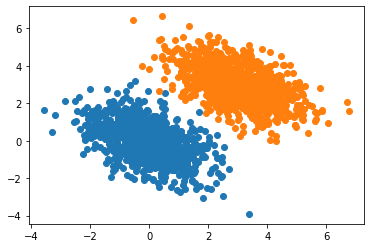

In [124]:
# Generate two classes of random points in 2D space
num_samples_per_class = 1000

covar_class_0 = -0.5
samples_class_0 = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[1, covar_class_0], [covar_class_0, 1]],
    size=num_samples_per_class)

covar_class_1 = -0.5
samples_class_1 = np.random.multivariate_normal(
    mean=[3, 3],
    cov=[[1, covar_class_1], [covar_class_1, 1]],
    size=num_samples_per_class)

# Assign targets
samples_class_0 = np.hstack((samples_class_0, np.zeros((num_samples_per_class,1))))
samples_class_1 = np.hstack((samples_class_1, np.ones((num_samples_per_class,1))))

all_samples = np.vstack((samples_class_0, samples_class_1))
np.random.shuffle(all_samples)
inputs = all_samples[:,:2]
targets = all_samples[:,2]

# Plot the classes
plt.scatter(samples_class_0[:,0], samples_class_0[:,1])
plt.scatter(samples_class_1[:,0], samples_class_1[:,1])
plt.show()


In [146]:
# Create linear classifier variables
# Note: A linear classifier is an affine transformation (prediction = W . input + b)
input_dim = 2 # Number of inputs
output_dim = 1 # Number of outputs

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim), dtype=tf.dtypes.float64))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,), dtype=tf.dtypes.float64))

In [147]:
# Define the forward pass functio
def model(inputs):
    return tf.matmul(inputs, W) + b

# Define the mean squared error loss
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [148]:
# Create the training step
learning_rate = 0.001

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss


In [149]:
# Conduct batch training
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:.4f}')


Loss at step 0: 1.2926
Loss at step 1: 1.2583
Loss at step 2: 1.2253
Loss at step 3: 1.1936
Loss at step 4: 1.1632
Loss at step 5: 1.1340
Loss at step 6: 1.1058
Loss at step 7: 1.0788
Loss at step 8: 1.0529
Loss at step 9: 1.0279
Loss at step 10: 1.0039
Loss at step 11: 0.9809
Loss at step 12: 0.9587
Loss at step 13: 0.9375
Loss at step 14: 0.9170
Loss at step 15: 0.8973
Loss at step 16: 0.8784
Loss at step 17: 0.8602
Loss at step 18: 0.8428
Loss at step 19: 0.8260
Loss at step 20: 0.8098
Loss at step 21: 0.7943
Loss at step 22: 0.7794
Loss at step 23: 0.7650
Loss at step 24: 0.7512
Loss at step 25: 0.7380
Loss at step 26: 0.7252
Loss at step 27: 0.7130
Loss at step 28: 0.7012
Loss at step 29: 0.6898
Loss at step 30: 0.6789
Loss at step 31: 0.6684
Loss at step 32: 0.6583
Loss at step 33: 0.6486
Loss at step 34: 0.6393
Loss at step 35: 0.6303
Loss at step 36: 0.6216
Loss at step 37: 0.6133
Loss at step 38: 0.6053
Loss at step 39: 0.5976


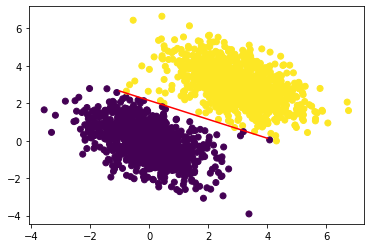

In [152]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, 'r')
plt.show()